In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15420, done.
remote: Total 15420 (delta 0), reused 0 (delta 0), pack-reused 15420
Receiving objects: 100% (15420/15420), 14.02 MiB | 21.34 MiB/s, done.
Resolving deltas: 100% (10362/10362), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

In [ ]:
!wget https://pjreddie.com/media/files/yolov2.weights

--2022-06-07 11:06:00--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194.49M  62.1MB/s    in 3.1s    

2022-06-07 11:06:04 (62.1 MB/s) - ‘yolov2.weights’ saved [203934260/203934260]



In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
%cd darknet

/content/darknet


In [ ]:
import os
os.chdir("/content/")

In [ ]:
'''# FUNCTION TO WRITE FILE NAMES IN A FOLDER WITH THEIR PATHS INTO A TEXT FILE
import os

with open("images.txt", "w") as a:
    files = os.listdir("/content/gdrive/MyDrive/final_i")
    path = "/content/gdrive/MyDrive/final_i"
    for filename in files:
      f = os.path.join(path, filename)
      a.write(str(f) + os.linesep)'''

In [ ]:
# Path of the image file in the place of data/dog.jpg
!./darknet detector test cfg/coco.data cfg/yolov2.cfg yolov2.weights data/dog.jpg

In [ ]:
# Command to run files using a txt file that contains all the input files
'''
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show -ext_output < /content/darknet/images.txt > /content/gdrive/MyDrive/Results/
#./darknet detector test cfg/voc.data yolo-voc.cfg yolo-voc.weights -dont_show -ext_output < data/train.txt > result.txt
'''

/bin/bash: /content/gdrive/MyDrive/Results/: Is a directory


In [ ]:
#Command to run all files in a folder without using a txt file, just insert folder path in the place of /content/gdrive/MyDrive/Breaks/
#This will give out the output files in the same folder with an extension _yolov2
!for i in /content/gdrive/MyDrive/Breaks/*.jpg; do ./darknet detector test cfg/coco.data cfg/yolov2.cfg yolov2.weights "$i" -dont_show; mv predictions.jpg "${i%.jpg}"_yolov2.jpg; done

In [ ]:
#Command to move predicted images from that folder to other folder, if need may arise
!mv /content/gdrive/MyDrive/Breaks/*_yolov2.jpg /content/gdrive/MyDrive/Results

In [ ]:
# Code to rename files in a folder if need may arise
'''import os
# count increase by 1 in each iteration
# iterate all files from a directory
for file_name in os.listdir("/content/gdrive/MyDrive/predictions/"):
    # Construct old file name
    source = "/content/gdrive/MyDrive/predictions/" + file_name

    # Adding the count to the new file name and extension
    destination = "/content/gdrive/MyDrive/predictions/" + file_name.replace("det","yolo4")

    # Renaming the file
    os.rename(source, destination)
    '''

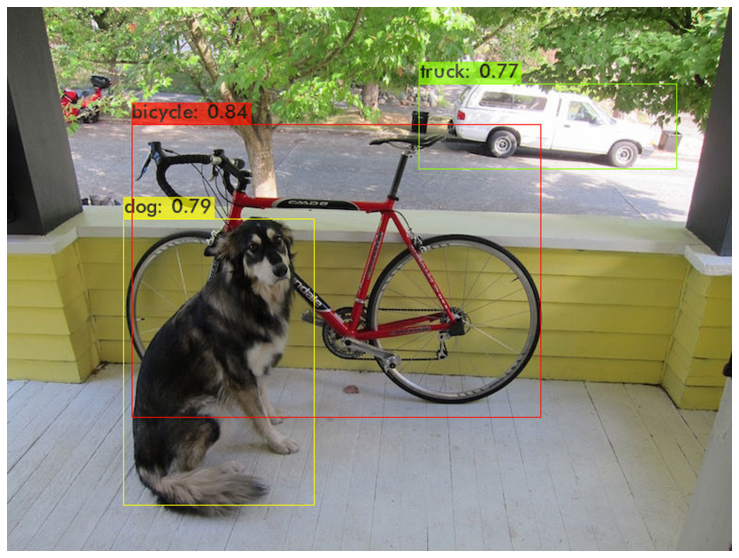

In [ ]:
imShow('predictions.jpg')

In [ ]:
from PIL import Image 
import PIL 
im1 = Image.open('predictions.jpg') 
im1 = im1.save("/content/gdrive/MyDrive/Breaks/mannequins_r759.jpg")